In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('rainbow')

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading the Data
df = pd.read_csv(r"/content/globalterrorismdb_0718dist.csv",encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
# Showing no. of rows and columns in a dataset
df.shape

(162258, 135)

In [ ]:
# Showing Columns of the Data
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
# Showing Data Types of the columns
df.dtypes

eventid         int64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG       float64
INT_IDEO      float64
INT_MISC      float64
INT_ANY       float64
related        object
Length: 135, dtype: object

In [ ]:
# Extracting Important Columns
df = df[['iyear','imonth','iday','country_txt','provstate','region_txt',
                       'attacktype1_txt','target1','nkill','nwound','summary','gname',
                       'targtype1_txt','weaptype1_txt','motive']]

In [ ]:
# Renaming of Columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
df.head()

,Year,Month,Day,Country,State,Region,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
# Checking for duplicated values
df.duplicated().sum()

9316

In [ ]:
# Dropping Duplicated Values
df.drop_duplicates(inplace=True)
df.shape

(152942, 15)

In [ ]:
## Checking for duplicated values
df.duplicated().any()

False

In [ ]:
# Checking No. of unique values in the columns
df.nunique()

Year              46
Month             13
Day               32
Country          205
State           2763
Region            12
AttackType         9
Target         81218
Killed           194
Wounded          231
Summary        93923
Group           3363
Target_type       22
Weapon_type       12
Motive         12233
dtype: int64

In [ ]:
# Checking for null values
df.isna().sum().sort_values()

Year                0
Month               0
Day                 0
Country             0
Region              0
AttackType          0
Target_type         0
Group               1
Weapon_type         1
State             419
Target            539
Killed           8179
Wounded         13445
Summary         58623
Motive         106159
dtype: int64

In [ ]:
# Counting Values of State Column
df['State'].value_counts()

Baghdad                         6621
Northern Ireland                4136
Unknown                         3653
Balochistan                     3109
Khyber Pakhtunkhwa              2794
                                ... 
Fergana (Province)                 1
Dnipropetrovsk (Oblast)            1
Atlantico Norte (Department)       1
Maluka (Province)                  1
Grand-Est                          1
Name: State, Length: 2763, dtype: int64

In [ ]:
# Treating Null Values in State Column
df['State'] = df['State'].replace({'Unknown': np.nan})
df['State'] = df['State'].fillna("Others")
df['State'].value_counts()

Baghdad                         6621
Northern Ireland                4136
Others                          4072
Balochistan                     3109
Khyber Pakhtunkhwa              2794
                                ... 
Fergana (Province)                 1
Dnipropetrovsk (Oblast)            1
Atlantico Norte (Department)       1
Maluka (Province)                  1
Grand-Est                          1
Name: State, Length: 2763, dtype: int64

In [ ]:
# Checking for null values
df['State'].isna().any()

False

In [ ]:
# Counting values for Target Column
df['Target'].value_counts()

Civilians                                                5113
Unknown                                                  4102
Patrol                                                   2404
Soldiers                                                 2267
Checkpoint                                               2203
                                                         ... 
son of independent nationalist (member of parliament)       1
Moslem Religious leader                                     1
Mayor Graciliano Lizarzo Arenas                             1
Mini-Micro Store                                            1
Leader: Malik Dehqan                                        1
Name: Target, Length: 81218, dtype: int64

In [ ]:
# Treating Null Values in Target Column
df['Target'] = df['Target'].replace({'Unknown': np.nan})
df['Target'] = df['Target'].fillna("Others")
df['Target'].value_counts()

Civilians                                                5113
Others                                                   4641
Patrol                                                   2404
Soldiers                                                 2267
Checkpoint                                               2203
                                                         ... 
son of independent nationalist (member of parliament)       1
Moslem Religious leader                                     1
Mayor Graciliano Lizarzo Arenas                             1
Mini-Micro Store                                            1
Leader: Malik Dehqan                                        1
Name: Target, Length: 81218, dtype: int64

In [ ]:
# Checking for null values
df['Target'].isnull().any()

False

In [ ]:
# Counting Values for Killed Column and Wounded Column
print(df['Killed'].value_counts())
print(df['Wounded'].value_counts())

0.0       72314
1.0       31812
2.0       12260
3.0        6733
4.0        4349
          ...  
1383.0        1
190.0         1
119.0         1
116.0         1
143.0         1
Name: Killed, Length: 194, dtype: int64
0.0      85541
1.0      13868
2.0       8851
3.0       6238
4.0       4143
         ...  
159.0        1
182.0        1
727.0        1
236.0        1
351.0        1
Name: Wounded, Length: 231, dtype: int64


<Axes: >

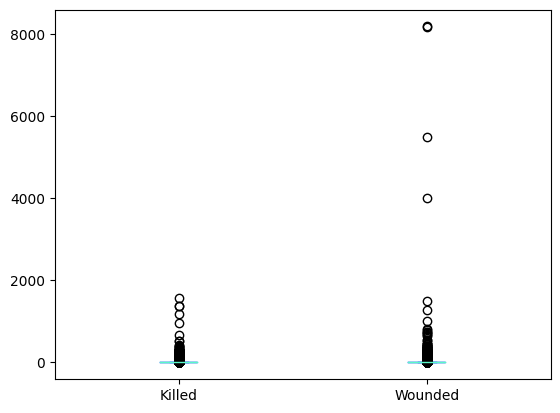

In [ ]:
# Checking for Outliers in Killed and Wouded Column
df[['Killed','Wounded']].plot(kind='box')

In [ ]:
# Treating Null Values in Killed and Wounded Column with median
df[['Killed', 'Wounded']] = df[['Killed', 'Wounded']].fillna(df[['Killed', 'Wounded']].mean())
df[['Killed','Wounded']].isnull().any()

Killed     False
Wounded    False
dtype: bool

In [ ]:
# Dropping Null Values of Summary and Motive Column
df = df.dropna(subset=['Summary'])
df = df.dropna(subset=['Motive'])

In [ ]:
# Checking for null values
df[['Summary','Motive']].isna().any()

Summary    False
Motive     False
dtype: bool

In [ ]:
# checking Unique Values of Day Column
df['Day'].unique()

array([ 1,  2,  3,  6,  9, 12, 13, 19, 22, 25, 26, 27, 30,  4,  8, 15, 16,
       17, 21, 23, 24,  5, 10, 11, 14, 20, 31,  0, 29,  7, 18, 28])

In [ ]:
# Changing Data of Day Column
df['Day'] = df['Day'].replace(0,np.nan)
df = df.dropna(subset=['Day'])

# Checking no. of unique values in Day Column
print(df['Day'].nunique())

# Checking for null values
print(df['Day'].isnull().any())

31
False


In [ ]:
# Checking for Null Values
df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
State          0
Region         0
AttackType     0
Target         0
Killed         0
Wounded        0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

In [ ]:
df.head()

,Year,Month,Day,Country,State,Region,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive
5,1970,1,1.0,United States,Illinois,North America,Armed Assault,Cairo Police Headquarters,0.0,0.0,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment
8,1970,1,2.0,United States,Wisconsin,North America,Facility/Infrastructure Attack,"R.O.T.C. offices at University of Wisconsin, M...",0.0,0.0,"1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft
9,1970,1,3.0,United States,Wisconsin,North America,Facility/Infrastructure Attack,Selective Service Headquarters in Madison Wisc...,0.0,0.0,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft
11,1970,1,6.0,United States,Colorado,North America,Facility/Infrastructure Attack,"Army Recruiting Station, Denver Colorado",0.0,0.0,1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War
14,1970,1,9.0,United States,Puerto Rico,North America,Facility/Infrastructure Attack,Baker's Store,0.0,0.0,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...


In [ ]:
# Resetting index
df.reset_index(inplace=True,drop=True)
df.head()

,Year,Month,Day,Country,State,Region,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive
0,1970,1,1.0,United States,Illinois,North America,Armed Assault,Cairo Police Headquarters,0.0,0.0,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment
1,1970,1,2.0,United States,Wisconsin,North America,Facility/Infrastructure Attack,"R.O.T.C. offices at University of Wisconsin, M...",0.0,0.0,"1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft
2,1970,1,3.0,United States,Wisconsin,North America,Facility/Infrastructure Attack,Selective Service Headquarters in Madison Wisc...,0.0,0.0,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft
3,1970,1,6.0,United States,Colorado,North America,Facility/Infrastructure Attack,"Army Recruiting Station, Denver Colorado",0.0,0.0,1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War
4,1970,1,9.0,United States,Puerto Rico,North America,Facility/Infrastructure Attack,Baker's Store,0.0,0.0,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...


In [ ]:
# Showing Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46503 entries, 0 to 46502
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         46503 non-null  int64  
 1   Month        46503 non-null  int64  
 2   Day          46503 non-null  float64
 3   Country      46503 non-null  object 
 4   State        46503 non-null  object 
 5   Region       46503 non-null  object 
 6   AttackType   46503 non-null  object 
 7   Target       46503 non-null  object 
 8   Killed       46503 non-null  float64
 9   Wounded      46503 non-null  float64
 10  Summary      46503 non-null  object 
 11  Group        46503 non-null  object 
 12  Target_type  46503 non-null  object 
 13  Weapon_type  46503 non-null  object 
 14  Motive       46503 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 5.3+ MB


In [ ]:
# Showing Statistical Summary of Numerical Columns
df.describe()

,Year,Month,Day,Killed,Wounded
count,46503.000000,46503.000000,46503.000000,46503.000000,46503.000000
mean,2007.310367,6.423736,15.316453,2.783286,5.034935
std,6.281649,3.397470,8.789026,16.199690,59.459206
min,1970.000000,1.000000,1.000000,0.000000,0.000000
25%,2005.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,1.000000,0.000000
75%,2011.000000,9.000000,23.000000,2.000000,3.375284
max,2016.000000,12.000000,31.000000,1570.000000,8191.000000


In [ ]:
# showing Summary of Categorical Columns
df.describe(include='O')

,Country,State,Region,AttackType,Target,Summary,Group,Target_type,Weapon_type,Motive
count,46503,46503,46503,46503,46503,46503,46503,46503,46503,46503
unique,163,1829,12,9,33002,46359,1313,22,12,12130
top,Iraq,Baghdad,South Asia,Bombing/Explosion,Civilians,06/13/2007: A total of four Iraqi civilians we...,Unknown,Private Citizens & Property,Explosives,Unknown
freq,8948,3726,15602,23471,2179,4,23818,13876,24581,14685


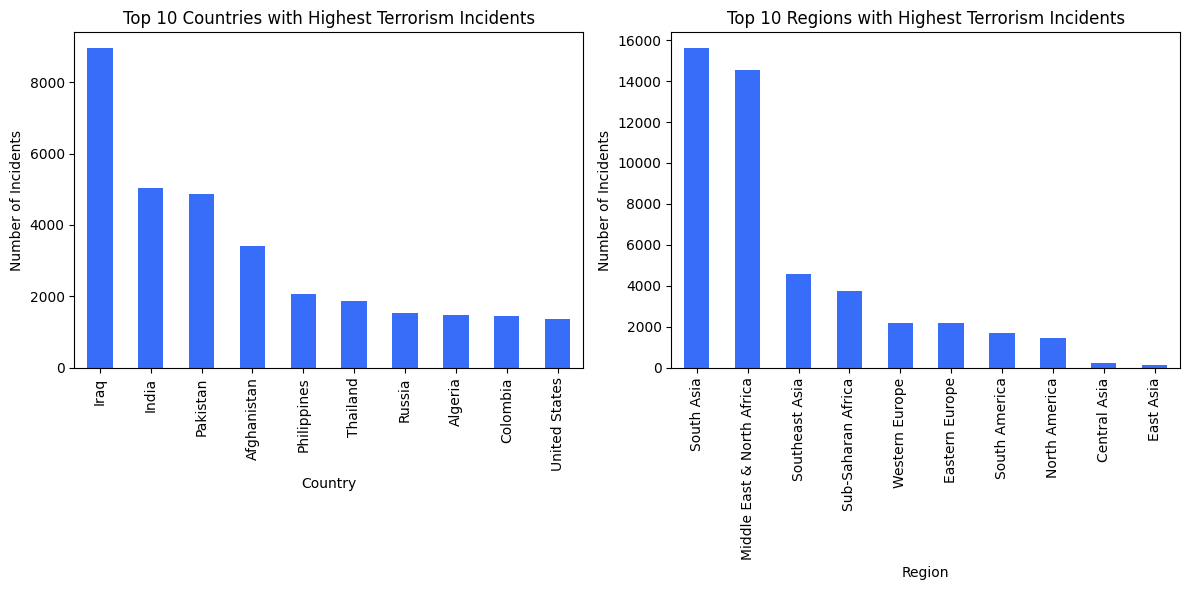

In [ ]:
# Filter relevant columns
df_hotzones = df[['Country', 'Region']]

# Count occurrences
country_counts = df_hotzones['Country'].value_counts()
region_counts = df_hotzones['Region'].value_counts()

# Identify hot zones
top_countries = country_counts.head(10)
top_regions = region_counts.head(10)

# Visualize the hot zones
plt.figure(figsize=(12, 6))

# Plot the top countries with the highest number of terrorist incidents
plt.subplot(1, 2, 1)
top_countries.plot(kind='bar')
plt.title('Top 10 Countries with Highest Terrorism Incidents')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')

# Plot the top regions with the highest number of terrorist incidents
plt.subplot(1, 2, 2)
top_regions.plot(kind='bar')
plt.title('Top 10 Regions with Highest Terrorism Incidents')
plt.xlabel('Region')
plt.ylabel('Number of Incidents')

plt.tight_layout()
plt.show()

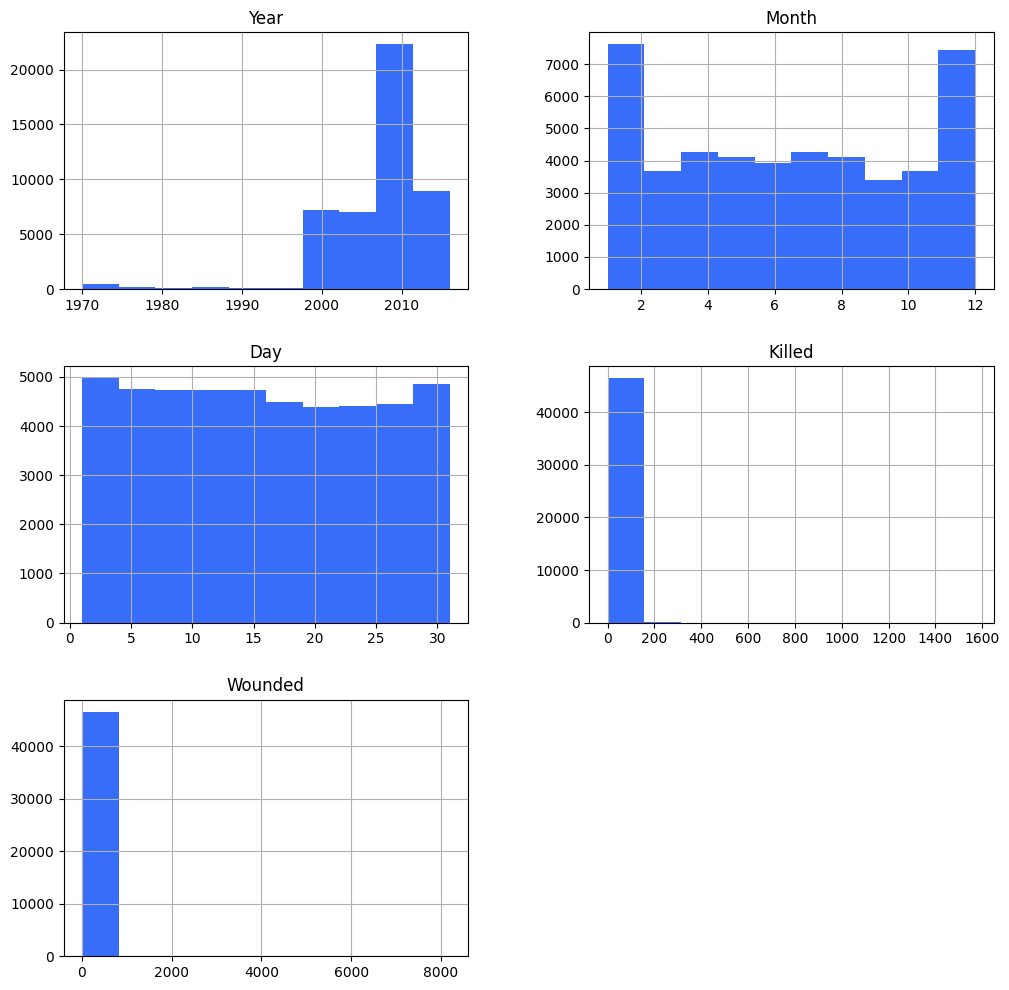

In [ ]:
df.hist(figsize=(12,12))
plt.show()

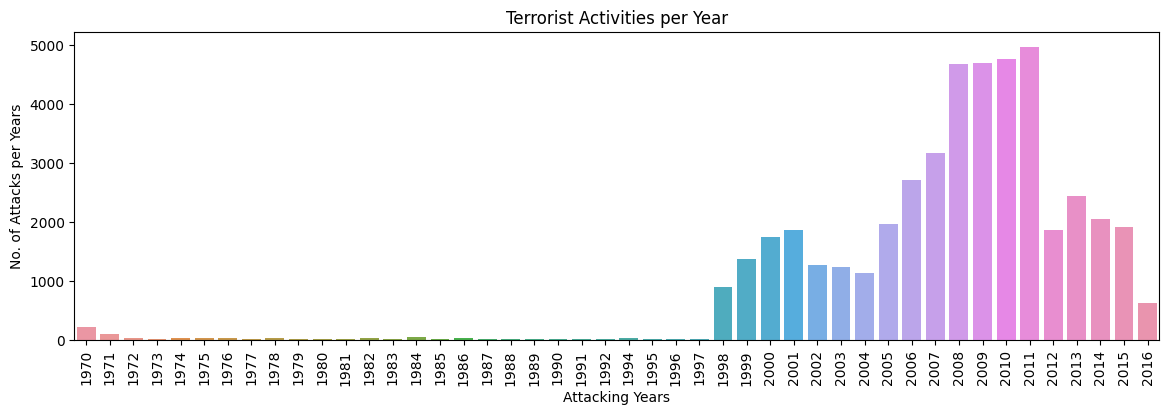

In [ ]:
# Plotting Countplot to show Attacks per Year
plt.figure(figsize=(14,4))
sns.countplot(x = df['Year'])
plt.title('Terrorist Activities per Year')
plt.xlabel('Attacking Years')
plt.ylabel('No. of Attacks per Years')
plt.xticks(rotation=90)
plt.show()

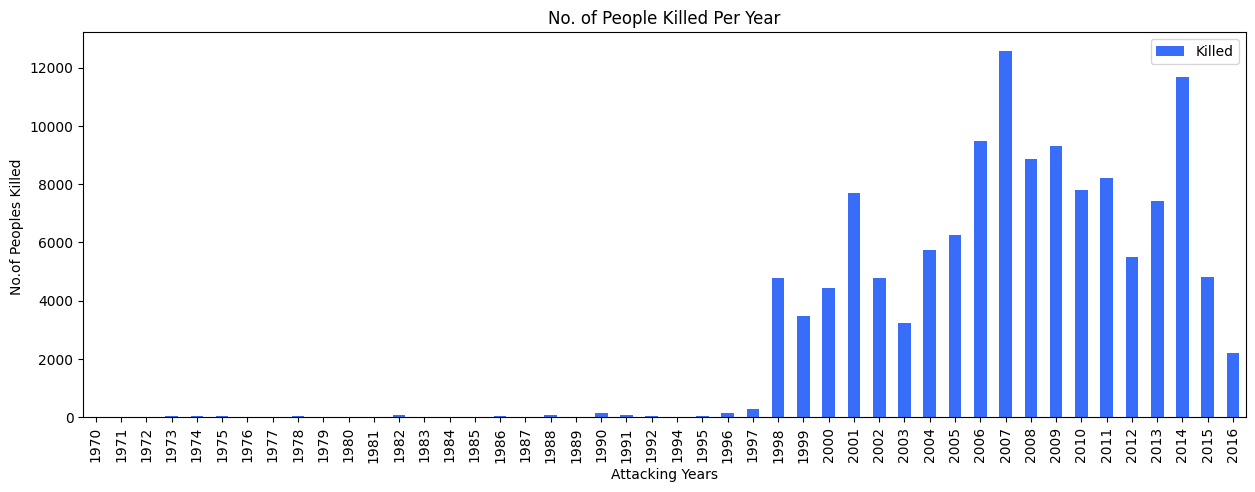

In [ ]:
# Showing Peoples Kiled Per Year
kill_per_year = df[['Year','Killed']].groupby('Year').sum()
kill_per_year.plot(kind='bar', figsize=(15,5), title = 'No. of People Killed Per Year')
plt.xlabel('Attacking Years')
plt.ylabel('No.of Peoples Killed ')
plt.show()

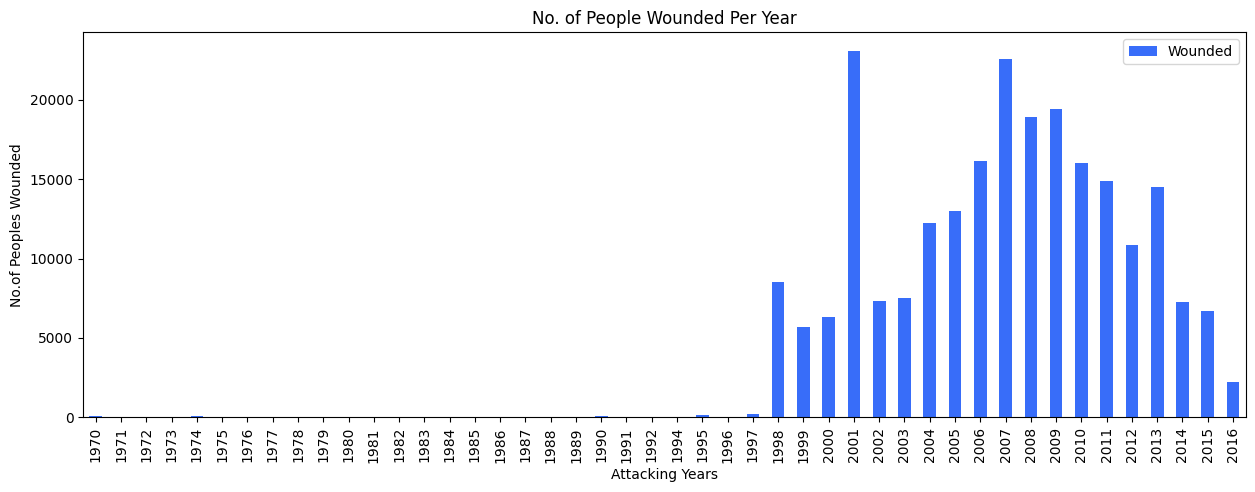

In [ ]:
wounded_per_year = df[['Year','Wounded']].groupby('Year').sum()
wounded_per_year.plot(kind='bar', figsize=(15,5), title = 'No. of People Wounded Per Year')
plt.xlabel('Attacking Years')
plt.ylabel('No.of Peoples Wounded')
plt.show()

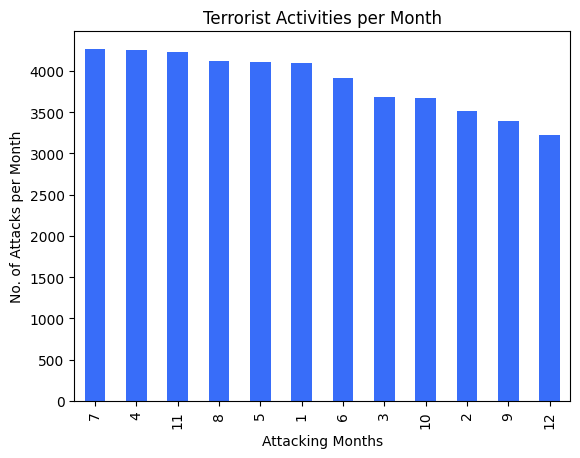

In [ ]:
df['Month'].value_counts().plot(kind='bar', title = 'Terrorist Activities per Month')
plt.xlabel('Attacking Months')
plt.ylabel('No. of Attacks per Month')
plt.show()

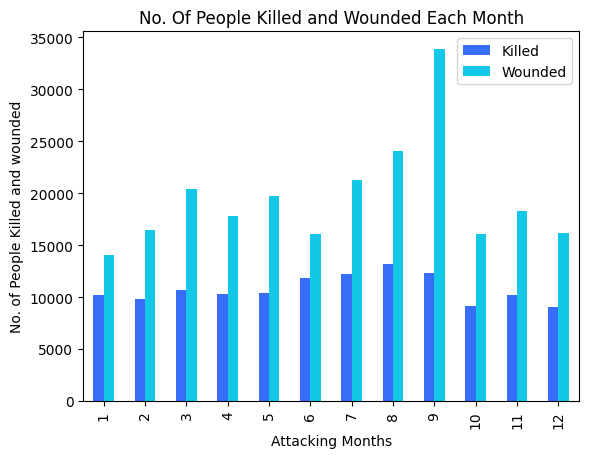

In [ ]:
kill_wounded_per_month = df[['Killed','Wounded','Month']].groupby('Month').sum()
kill_wounded_per_month.plot(kind='bar', title = 'No. Of People Killed and Wounded Each Month')
plt.xlabel('Attacking Months')
plt.ylabel('No. of People Killed and wounded')
plt.show()

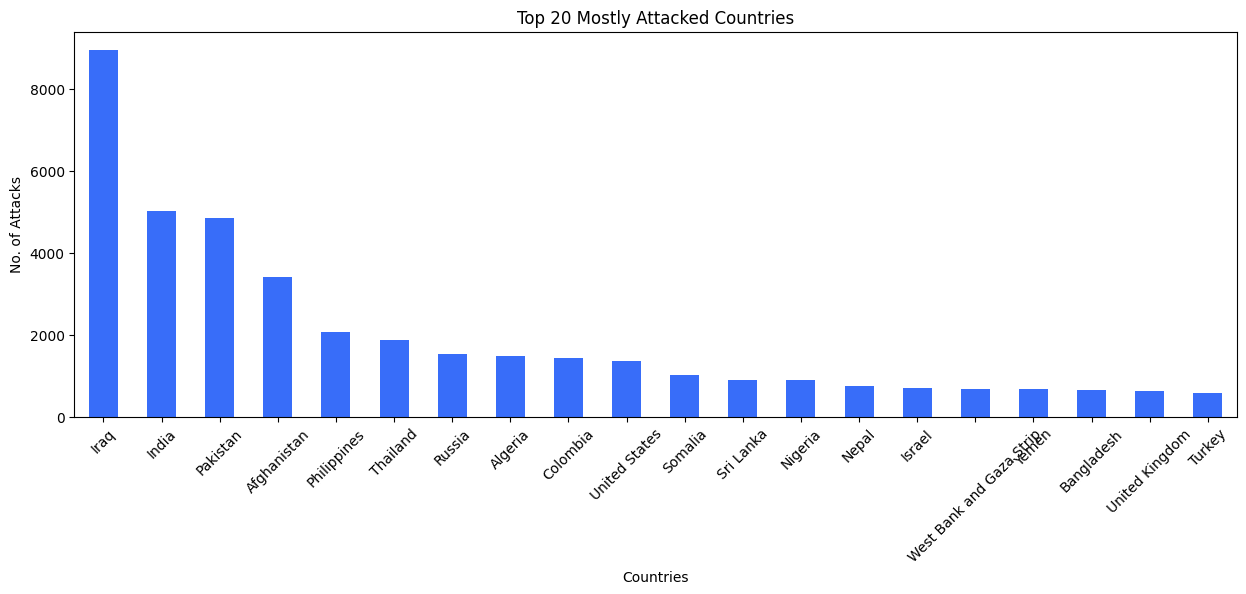

In [ ]:
plt.figure(figsize=(15,5))
most_attack_countries = df['Country'].value_counts().head(20)
most_attack_countries.plot(kind='bar')
plt.title('Top 20 Mostly Attacked Countries')
plt.xlabel('Countries')
plt.ylabel('No. of Attacks')
plt.xticks(rotation=45)
plt.show()

State wise:

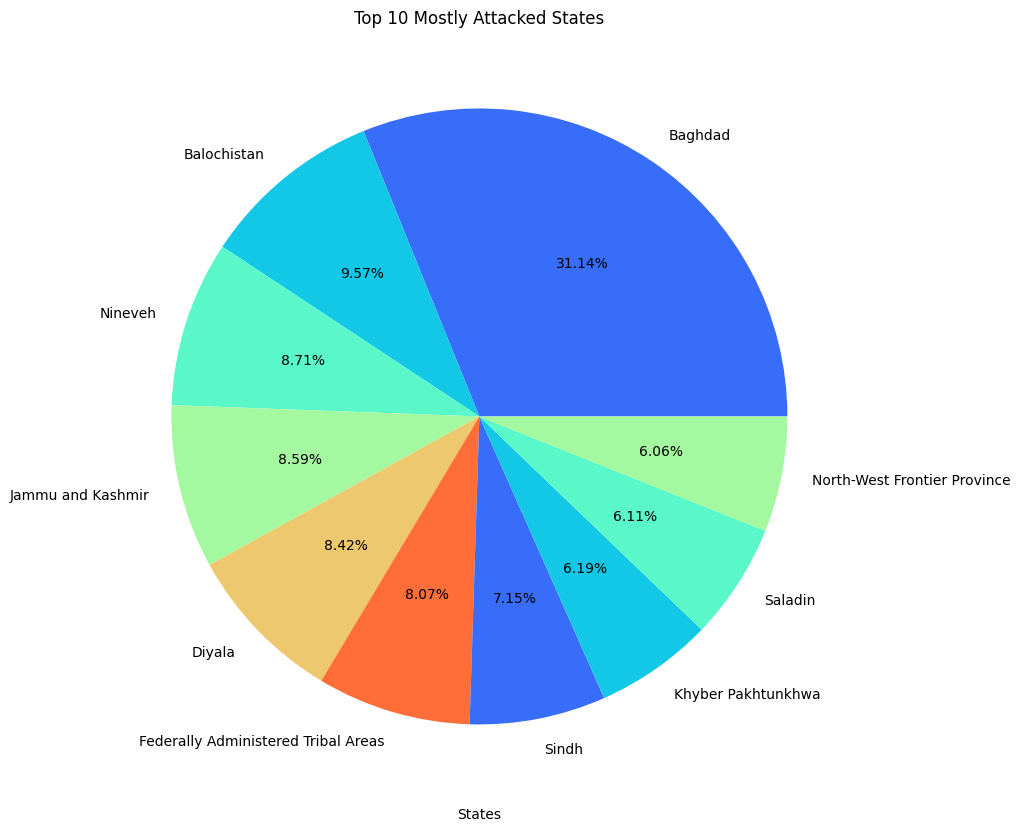

In [ ]:
plt.figure(figsize=(15,10))
most_attack_countries = df['State'].value_counts().head(10)
most_attack_countries.plot(kind='pie',autopct = '%.2f%%')
plt.title('Top 10 Mostly Attacked States')
plt.xlabel('States')
plt.ylabel(None)
plt.show()

Region wise

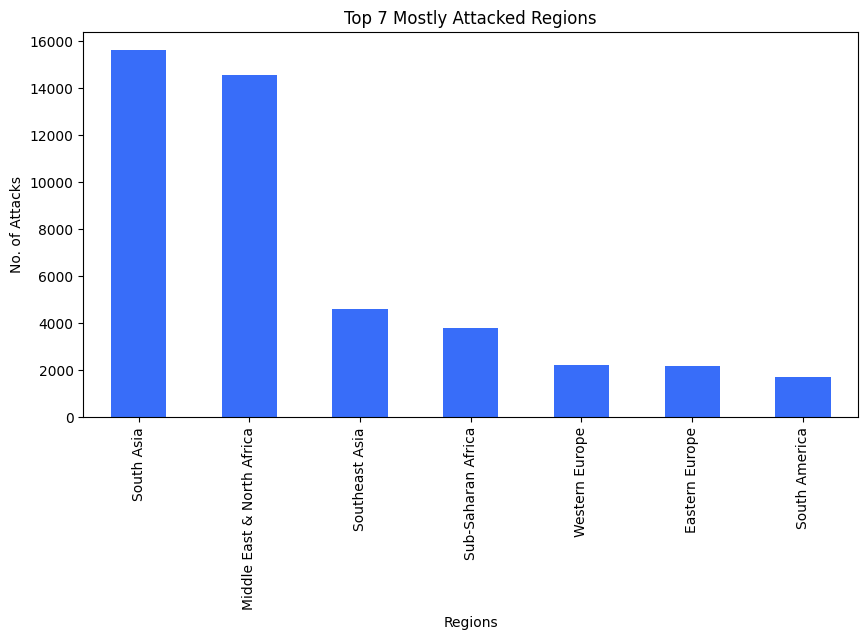

In [ ]:
plt.figure(figsize=(10,5))
most_attack_regions = df['Region'].value_counts().head(7)
most_attack_regions.plot(kind='bar')
plt.title('Top 7 Mostly Attacked Regions')
plt.xlabel('Regions')
plt.ylabel('No. of Attacks')
plt.xticks(rotation=90)
plt.show()

AttackType wise:

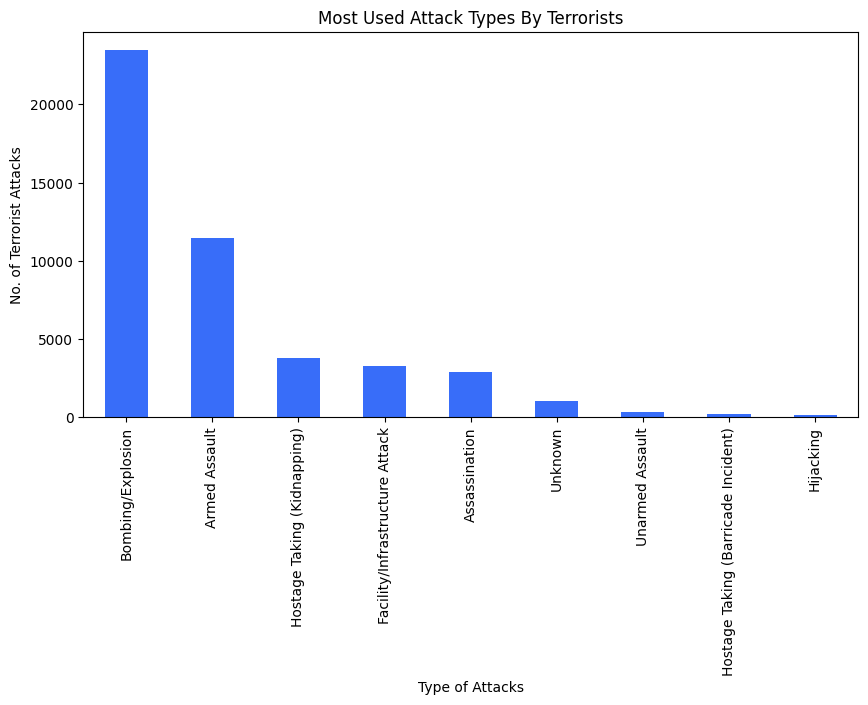

In [ ]:
# Plotting Most Used Attacks Types by Terrorist
plt.figure(figsize=(10,5))
most_attack_regions = df['AttackType'].value_counts()
most_attack_regions.plot(kind='bar')
plt.title('Most Used Attack Types By Terrorists')
plt.xlabel('Type of Attacks')
plt.ylabel('No. of Terrorist Attacks')
plt.xticks(rotation=90)
plt.show()

Target wise

In [ ]:
df['Target'].value_counts()

Civilians                                                                             2179
Others                                                                                1490
Soldiers                                                                               203
Officers                                                                               188
Checkpoint                                                                             180
                                                                                      ... 
The family of Iraqi National Guard member Ibrahim Omar                                   1
Director of Deputy Prime Minister Chalabi's office, Haidar Mohammed Ali al-Dujaili       1
An electricity substation near Khasavyurt                                                1
Marja (District) Ulema Council Chief Mawlawi Zarif                                       1
Leader: Malik Dehqan                                                                     1

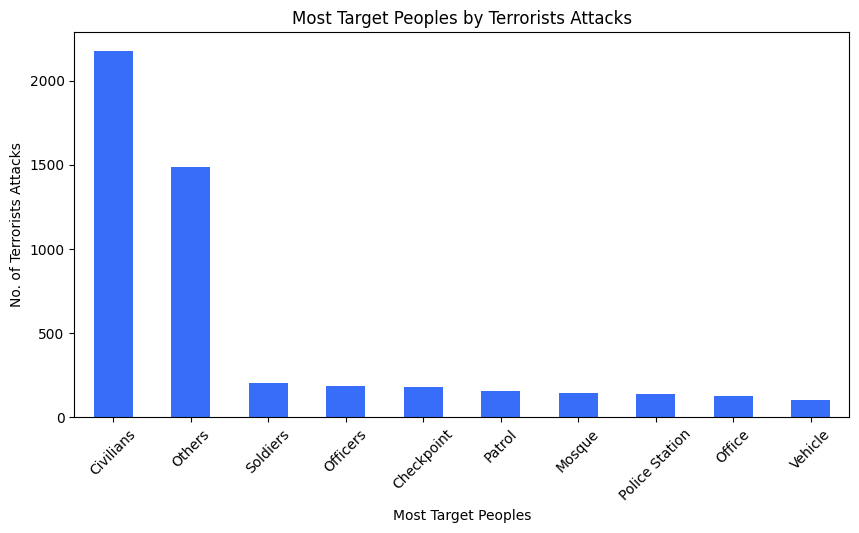

In [ ]:
plt.figure(figsize=(10,5))
most_target_peoples = df['Target'].value_counts().head(10)
most_target_peoples.plot(kind='bar')
plt.title('Most Target Peoples by Terrorists Attacks')
plt.xlabel('Most Target Peoples')
plt.ylabel('No. of Terrorists Attacks')
plt.xticks(rotation=45)
plt.show()

Group wise:

In [ ]:
terr_groups = df['Group'].value_counts()
terr_groups

Unknown                                           23818
Taliban                                            2003
Communist Party of India - Maoist (CPI-Maoist)     1552
Revolutionary Armed Forces of Colombia (FARC)       884
Tehrik-i-Taliban Pakistan (TTP)                     780
                                                  ...  
Salafi Daawa Group                                    1
Balochistan National Army                             1
Etnocacerista Movement                                1
Liberals of Galilee                                   1
Islamic State in Egypt                                1
Name: Group, Length: 1313, dtype: int64

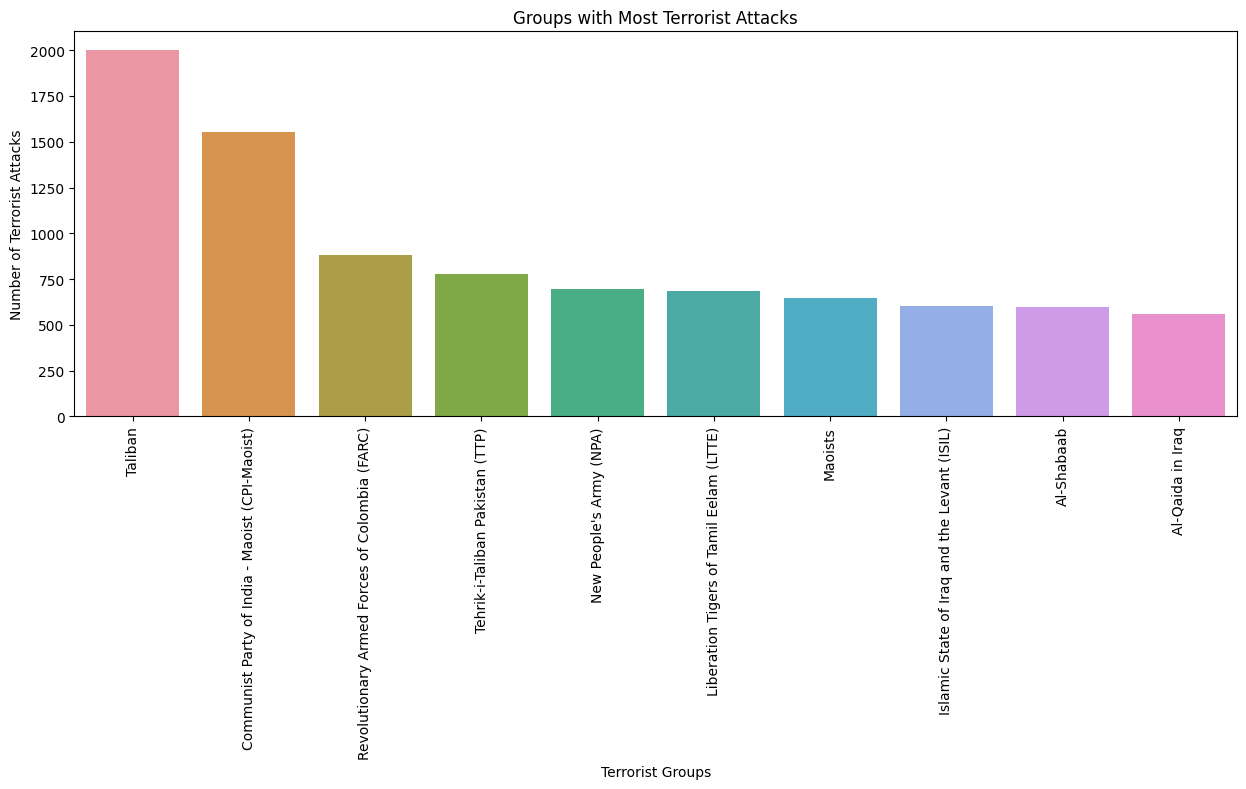

In [ ]:
# Plotting Top 10 Groups Most Terrorist Attacks
fig = plt.figure(figsize=(15,5))
sns.barplot(x= terr_groups[1:11].index, y = terr_groups[1:11].values)
plt.title('Groups with Most Terrorist Attacks')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of Terrorist Attacks')
plt.xticks(rotation=90)
plt.show()

Target wise:

In [ ]:
targets = df['Target_type'].value_counts()
targets

Private Citizens & Property       13876
Government (General)               6839
Police                             5817
Business                           4938
Military                           3982
Transportation                     1973
Religious Figures/Institutions     1676
Educational Institution            1630
Utilities                           944
Terrorists/Non-State Militia        804
Government (Diplomatic)             784
Journalists & Media                 735
Unknown                             554
Violent Political Party             429
NGO                                 383
Telecommunication                   363
Airports & Aircraft                 229
Abortion Related                    199
Tourists                            133
Food or Water Supply                 84
Maritime                             77
Other                                54
Name: Target_type, dtype: int64

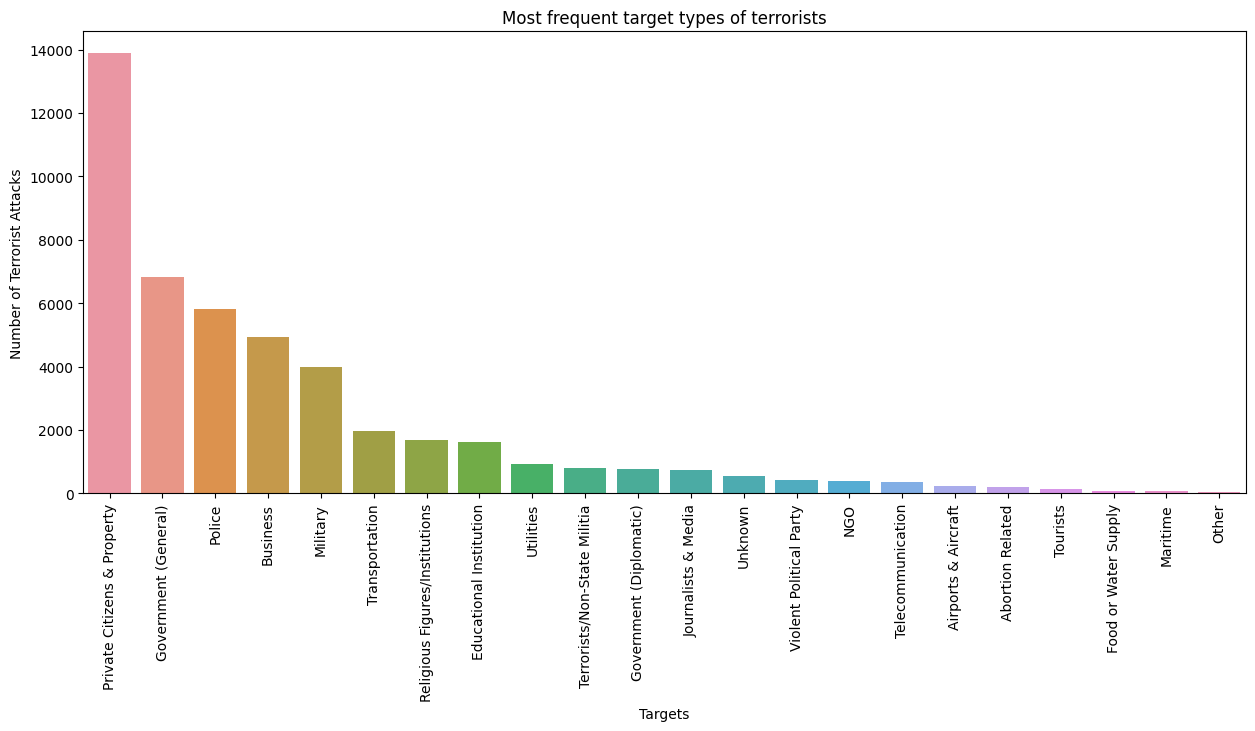

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.barplot(x = targets.index, y = targets.values)
plt.title("Most frequent target types of terrorists")
plt.xlabel("Targets")
plt.ylabel("Number of Terrorist Attacks")
plt.xticks(rotation=90)
plt.show()

Weapon_Type wise:

In [ ]:
weapon_used = df['Weapon_type'].value_counts().head()
weapon_used

Explosives    24581
Firearms      14453
Incendiary     3124
Unknown        2866
Melee          1136
Name: Weapon_type, dtype: int64

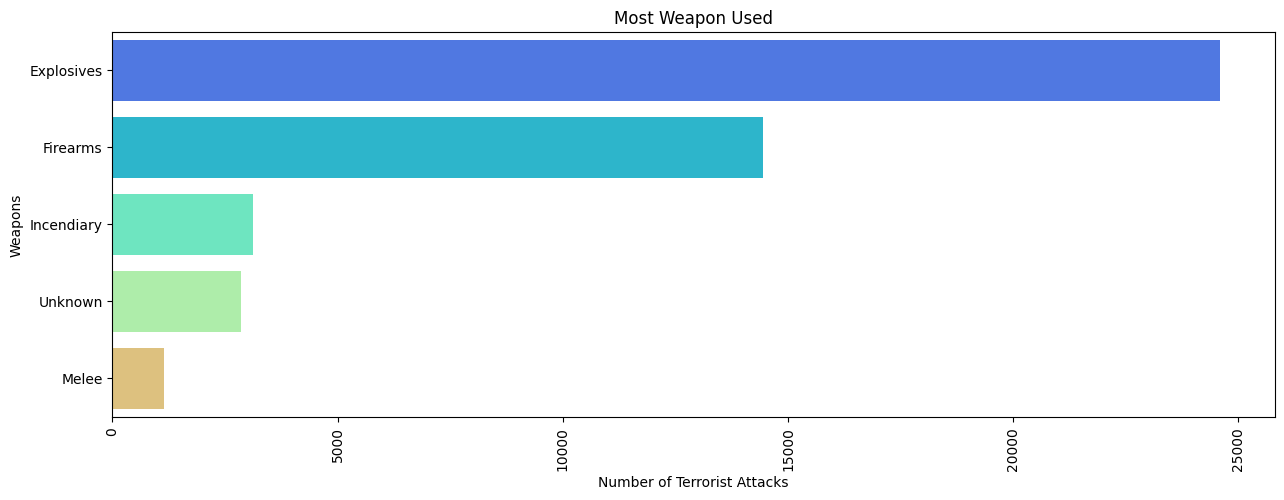

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.barplot(y = weapon_used.index, x = weapon_used.values)
plt.title("Most Weapon Used")
plt.xlabel("Number of Terrorist Attacks")
plt.ylabel("Weapons")
plt.xticks(rotation=90)
plt.show()

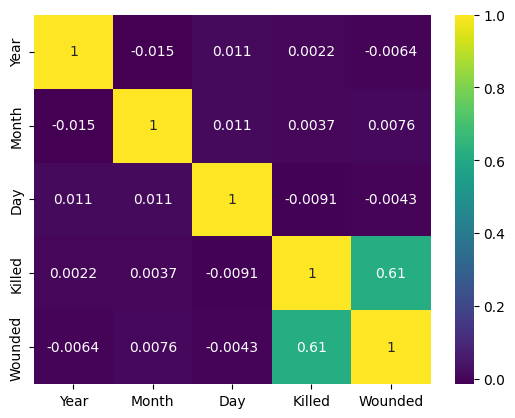

In [ ]:
# Showing Correlation Between different Columns
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

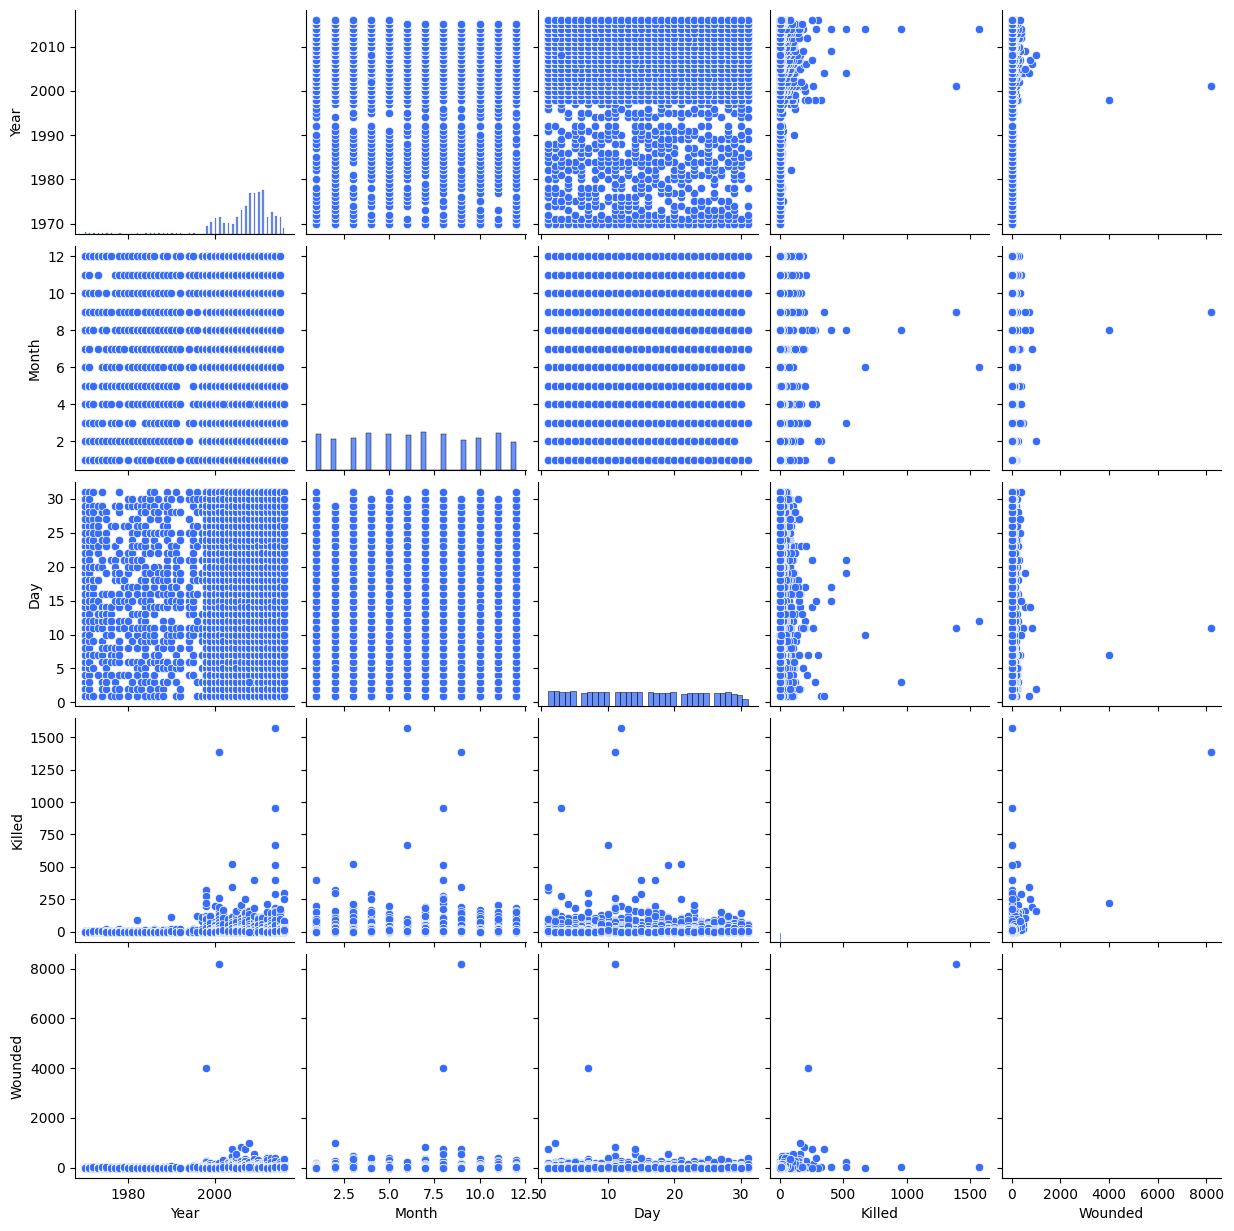

In [ ]:
sns.pairplot(df)

In [ ]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'AttackType',
       'Target', 'Killed', 'Wounded', 'Summary', 'Group', 'Target_type',
       'Weapon_type', 'Motive'],
      dtype='object')